# Computer lab 1 (CL1) - Linear regression

The *python-crash-course* taught you general basics of python.
The computer labs *CL1* and *CL2* will now specifically introduce you to python for machine learning.
The goal is to provide you with a few hands-on examples of simple regression and classification so that you can build intuition for these types of problems and to show you a standard way of developing a machine learning algorithm in python.

The labs will give you experience with a few well-known python libraries (called *modules*) which will be used in the course.
Extra important is the machine learning module called Pytorch, but also libraries for data manipulation and visualisation, such as Pandas, Matplotlib and Numpy.

We strongly encourage you to play with the code and explore ways of manipulating and plotting the data, that is how you build up your intuition.

For this computer lab, we'll be using the IRIS dataset. Initially, we'll only look at a subset of it, and perform linear regression on two features of a given class.

## 0.  Import the necessary modules

We'll start off using three different modules. The Numpy and Matplotlib modules were introduced in the `python-crash-course` and below we'll give a brief introduction to Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# This last line is a special jupyter command
# which makes matplotlib plots show up in notebooks themselves.

# 1. Loading the data

### 1.1  Read the dataset from a .csv file

Load the [IRIS dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) using Pandas. The method `read_csv(<filename>)` takes a path to a csv-file and returns a `DataFrame` object containing the data found in the file.

Pandas data frames are a great way of handling simple data, where the entire dataset can be read into the computer memory all at once.
Later, we will handle more complex data which will require us to create so called *Dataloaders*.

In [2]:
# The file `iris.csv` is located in our current directory (<repo_root>/computer-labs/CL1),
# otherwise the function would fail.
dataset = pd.read_csv("iris.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

### 1.2  Analyze the dataset

This dataset is comprised of morphologic data from three different species of the Iris flowers: Setosa, Virginica and Versicolor.

<table style="width:100%">
  <tr>
    <th> <center>Iris Setosa</center> </th>
    <th> <center>Iris Virginica</center> </th> 
    <th> <center>Iris Versicolor</center> </th>
  </tr>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris Setosa"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" alt="Iris Virginica"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg" alt="Iris Virginica"></td>
  </tr>
</table>

The lenght and width of both the petals and the sepals of each flower, together with its corresponding species were measured and stored in this dataset. Sepals and petals are both parts of a flower. Sepals are the outermost part of the whorl and the petals are the innermost part.
![](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

Let's take a look at what's inside the dataset now. The attribute `shape` of `DataFrame` objects returns the dimensions of the data inside it.

In [4]:
dataset.shape

(150, 5)

Apparently, this dataset has 150 rows and 5 columns. It's easy to infer that this means 150 flowers were collected, and 5 different features were registered for each one. We can also take a closer look at them, using the method `head()`, which returns the first 5 rows by default (you can also pass a parameter to it, which specifies a different amount of rows to be shown).

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here we can see the header names for each column, together with the first rows, confirming that the species and morphologic measurements for each flower were collected. We can extract individual columns of this `DataFrame` by indexing using their names, for instance:

In [6]:
dataset["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

Additionally, we can check which species are present in the dataset using the `unique` method,

In [7]:
print(dataset["species"].unique())

['setosa' 'versicolor' 'virginica']


where we see that only these three species are present in this dataset, as expected.

We can also learn more about the data types of each column with the method `info`.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Here we see that the first four columns' elements are floating point numbers, and the last column's elements are objects (in this case, strings).

### 1.4  Extract the desired data

For this initial task, we are only interested in the setosa species. This corresponds to all the rows which have the column 'species' equal to the string 'setosa'. In order to extract these rows, we use [logical indexing in Pandas](https://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing).

In [9]:
# This returns a boolean series, which for every row in the dataframe checks
# whether a row is a setosa row or not.
# We can use it to index our DataFrame object
extract_rule = (dataset['species']=='setosa')
print(extract_rule)

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool


In [10]:
# We use the boolean series to index the DataFrame object.
# This will give us a new dataframe which only contains the setosa rows
setosa_dataset = dataset[extract_rule]
setosa_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


We can also extract columns from the `DataFrame`.
Suppose that we want to investigate the relationship between two features of this species, the 'sepal_length' and 'sepal_width'. To extract these, we [index the `DataFrame` using the name of the columns](https://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-label)  we want.

In [11]:
x = setosa_dataset['sepal_length'].values
y = setosa_dataset['sepal_width'].values

Note that the attribute `values` in a `DataFrame` object returns a numpy array.
That is, extracting a single column in a `DataFrame` gives us a numpy array, not another `DataFrame`

In [12]:
type(x)

numpy.ndarray

#### The shape of a Numpy array (or Pytorch tensor)
Let's take a short detour to stress the importance of the shape of an `ndarray`. This applies also to the Pytorch tensors we will use later.

The shape is an attribute of the array and is represented by a tuple, e.g.:

```python
x.shape # outputs the tuple (50,)
```
Numpy makes a distinction between the shapes `(50,)` and `(50,1)`.
To us this means the same thing, it's an object with 50 elements,
but they are not interchangeable in Numpy and can produce unexpected results.
In addition, some aggregating Numpy operations (like `mean` and `sum`) change the dimensions of the output.

To prevent this and get consistent results to force the array into a certain shape.
There are many ways to do this but it is good practice to use the `.reshape(<new_shape>)` function since it a) clearly communicates what we want the new shape to be and b) if we are mistaken about a shape, the code will fail explicitly and we can detect the bug at the source.

Reshape the `x` and `y` arrays to reflect that they represent `num_samples` of 1 dimensional data.
(We could probably get by without this particular reshape, but it's good to make it a habit.)

In [13]:
num_samples = x.shape[0]
x = x.reshape((num_samples, 1))
y = y.reshape((num_samples, 1))

Now we can use matplotlib to plot all the examples in a 2D plane, where each dimension is one of the features described earlier.

Text(0, 0.5, 'sepal width')

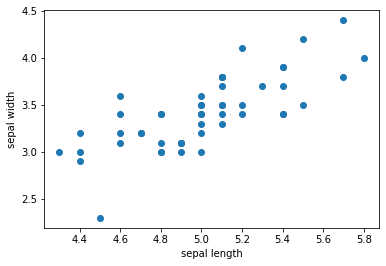

In [14]:
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

It seems like the relation between these features could be approximated using a linear function, such as 
$f(x) = w\cdot x + b$. Let's try finding the parameters $w$ and $b$ that would make the best approximation.

### 1.5  Guess the values of w and b

We'll start with some educated guesses. To make this more convenient, we'll first define a function to plot a scatter plot of the provided data, together with a straight line with parameters specified by the user.

In [15]:
# Define a function to plot the data and a parameterized line
def plot_data_and_line(w, b, x, y, ax, line_color='r', line_label=''):
    
    # Create points lying on the line
    xline = np.unique(x)
    yline = w*xline + b

    # Plot both the line and the points from the dataset
    ax.scatter(x,y, color='C0')
    ax.plot(xline, yline, color=line_color, label=line_label)
    ax.set_xlabel('sepal length')
    ax.set_ylabel('sepal width') 

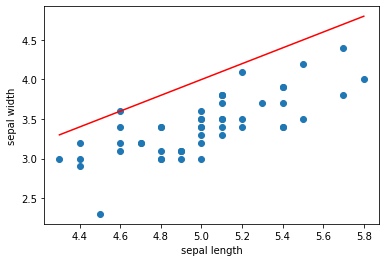

In [16]:
fig, ax = plt.subplots()
plot_data_and_line(1, -1, x, y, ax)

Additionally, another way of evaluating the quality of our approximation is to compute the MSE ([mean squared error](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/)) between the true y features in the dataset and our predictions. So that we can use this value as well to guide our guesses, create a function to compute it (first, it might be beneficial to write down the analytical expression for it).

In [17]:
# Create a function called `mse` to compute the mean squared error
# YOUR CODE HERE
def mse(x, y, ax, line_color='r', line_label='', learning_rate=0.01, num_iterations=1000):
    num_samples = len(x)
    
    # Initialize weights and bias with zeros
    w = 0.0
    b = 0.0
    
    for _ in range(num_iterations):
        # Compute predictions
        y_pred = w * x + b
        
        # Compute gradients
        dw = -(2/num_samples) * np.sum(x * (y - y_pred))
        db = -(2/num_samples) * np.sum(y - y_pred)
        
        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

    # Create points lying on the line
    xline = np.unique(x)
    yline = w * xline + b

    # Plot both the line and the points from the dataset
    ax.scatter(x, y, color='C0')
    ax.plot(xline, yline, color=line_color, label=line_label)
    ax.set_xlabel('sepal length')
    ax.set_ylabel('sepal width')

    return w, b

Now we can try different values of $w$ and $b$ and see how the resulting linear approximation looks like, compared to the scatter plot of our data. Using both the plot and the MSE, try searching for values of $w$ and $b$ that yield a good approximation.

NameError: name 'w' is not defined

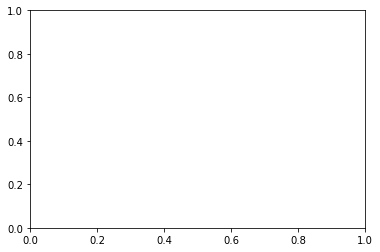

In [18]:
# Here, we just check that you actually implemented the `mse` function. 
try:
    mse
except NameError:
    raise NotImplementedError(
        "You need to implement a function `mse` in the cell above. Don't forget to run the cell!")

# Guess the values for w and b
# YOUR CODE HERE

# Plot your guess
fig, ax = plt.subplots()
plot_data_and_line(w, b, x, y, ax)

# Compute guess
y_guess = w*x+b

# Not strictly necessary but good practice to ensure same shape for predictions and target
y_guess = y_guess.reshape(y.shape)

# Compute and print the MSE of the guess
print("MSE of your guess:", mse(y,y_guess))

# Sanity check: the MSE for the guess (w, b) = (1, -1) should be around 0.41

---

# 2. Training a model with `autograd`

Now comes the part where we start using Pytorch to actually train a model.
Pytorch is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate general neural networks.

It is not necessary for completing these labs, but if you are interested, take a look at Pytorch's
- [documentation](https://pytorch.org/docs/stable/index.html)
- [tutorials](https://pytorch.org/tutorials/)


Pytorch contains a number of modules and classes that enable us to define and train neural networks in a compact and elegant manner. However, since it is so compact it may at first be challenging to understand what's going on under the hood. In order to clarify what the different modules do, we will first present a code example using basic Python commands and the `autograd` package from Pytorch. After that we will introduce standard Pytorch commands for expressing the code more compactly.

More details on the `autograd` package can be found [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py) and [here](https://pytorch.org/docs/stable/notes/autograd.html). Note that Pytorch works with tensors (type = `torch.Tensor`) but since they work very similarly to numpy arrays we do not teach them separately. 

For the low-level example we will use Pytorch to train a linear regressor that predict sepal width from sepal length.
In order for `autograd` to work, we first need to change our data from Numpy arrays to Torch tensors.

In [19]:
import torch
# A `numpy array` can easily be made into a `torch.Tensor´
torch_x = torch.tensor(x, dtype=torch.float32)
torch_y = torch.tensor(y, dtype=torch.float32)

: 

: 

Note: if we don't provide the argument `dtype`, the `tensor` function tries to infer the type of the `Tensor` that will be created from the type of the data supplied. In this case, this is a problem, since `x_train` is of type `float64`:

In deep learning, memory is usually a bottleneck, so it's common to use `float32` for the parameters of the neural network. Having the input (in this case `x_train`) as `float64`, and the parameters of the net as `float32` causes Pytorch to throw an error, and is a common error.

### 2.1 Introducing the model parameters
We will use the same simple linear (or rather affine) model $f(x) = w \cdot x + b$.
By turning on `requires_grad`, `autograd` will keep track of all operations performed on these tensors and help us compute gradients.

We initialise the model parameters ($w, b$) by drawing values from a standard normal distribution, and show two ways of enabling the `requires_grad` attribute.

In [3]:
w = torch.randn(1)
w.requires_grad_()
b = torch.randn(1, requires_grad=True)
# w and b are now singleton tensors:
print(w)
# We can access the actual value like this:
print(w.item())

tensor([1.0276], requires_grad=True)
1.0275852680206299


### 2.2 Defining the model and the loss function

The model is an affine mapping from $x$ to $y$.
We will train the model with the MSE loss.
Pytorch and Numpy have very similar syntax so chances are that the MSE function you defined above would work as a loss function.
The important thing is that it handles `Tensor`s as input so that `autograd` works.

To make sure that the loss function works, we redefine the MSE function below.

In [4]:
# TODO: w, b as args
def model(x, w, b):
    """Mean squared error loss
    B = batch size
    
    Args:
        x (Tensor): network input with shape (B, 1).
    Returns:
        mse_loss (float)
    """
    return w * x + b

def mse_loss(pred, target):
    """Mean squared error loss
    B = batch size
    
    Args:
        pred (Tensor): network output with shape (B, 1).
        target (Tensor): network output with shape (B, 1).
    Returns:
        mse_loss (float)
    """
    return ((pred - target)**2).mean()

loss_fn = mse_loss

### 2.3 Training the network
To train the network we will do the following:

* Select a minibatch of data.
* Compute the loss for this data.
* Perform a step of gradient descent.

We do this for a number of epochs. To perform gradient descent, the method `.backward()` from the `autograd` packages is used to compute the gradients with respect to all variables for which `requires_grad=True`.

In [5]:
# Number of epochs, batch size, number of training data and learning rate
epochs = 20 
batchsize = 32
lr = 0.01

for epoch in range(epochs):
    # We use this to compute the average loss in each epoch
    losses = []
    for i in range((num_samples - 1) // batchsize + 1):
        #  Extracting the data in the current minibatch
        start = i * batchsize
        end   = start + batchsize
        b_x   = torch_x[start:end]
        b_y   = torch_y[start:end]
        
        # Computing the loss for the current minibatch
        pred = model(b_x, w, b)
        loss = loss_fn(pred,b_y)
        losses.append(loss.item()) # and storing to print the number below
        
        # Performing a step of gradient descent
        loss.backward()
        # `autograd` registers every change to our parameters.
        # However, the actual gradient step should not affect the gradient.
        # Python has the key word `with` which creates a scope in our code.
        # Here, we use it to temporarily disable `autograd`. After the indented block,
        # `autograd` automatically resumes.
        with torch.no_grad():
            w -= w.grad * lr
            b -= b.grad * lr
            # We need to end with weights.grad.zero_() and bias.grad.zero_()
            # in order to reset the gradient calculations in autograd
            # before computing the gradients for the next minibatch.
            w.grad.zero_()
            b.grad.zero_()
            
    # Computing and printing the average loss in the current epoch
    avg_loss = sum(losses)/len(losses)
    print('Epoch: {}\tAvg loss: {}'.format(epoch, avg_loss))

NameError: name 'num_samples' is not defined

Let's see what our model has learned:

In [ ]:
fig, ax = plt.subplots()
plot_data_and_line(w.item(), b.item(), torch_x, torch_y, ax)

y_guess = w*torch_x+b
y_guess = y_guess.reshape(torch_y.shape)
print("MSE of the learned model:", mse(torch_y,y_guess))

# 3 Simplifying the code with Pytorch

We will redo the simple example, but now using the full capabilities of the Pytorch module.

There are a number of things that we can do to make the code shorter. Once you understand what the different modules do, shorter code also means that it is faster for you to read and write it, and it may also run faster. It will probably also be less prone to errors since we leverage on built-in commands to a much greater extent. We here consider three types of adjustments.

### 3.1 Data loaders
Pytorch expects to get data from a so called *data loader*.
A data loader is an object that provides your machine learning model with *batches* of data.
That way, we don't have to load our entire dataset into memory at once. Instead we get smaller, more manageable batches of data to work with.
To create a `DataLoader` object, we first create a `TensorDataset`. The actual dataset can be stored in memory, on the hard drive or even on some remote server. `TensorDataset` is an abstraction over our data which provides methods for how to obtain a sample from our data.
Finally, the `DataLoader` class takes an instance of our `TensorDataset` class (and some other configuration parameters) and automatically provides methods for iterating over the full data in batches.

It is a bit overkill to do this with our simple Iris data (we have already seen how to do it with a `DataFrame`),
but you will soon run into more complex data which do require a dataloader.

In [1]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

Current shape of `x` (and `y`) is (50,1).

In [6]:
print("Shape of x: {}".format(x.shape))
print("Shape of y: {}".format(y.shape))

NameError: name 'x' is not defined

Again, we need to be careful with the actual dimension of our dataset.

The loader expects data of size `(N,D)`, where `N` is the number of samples in the dataset, and `D` is the dimension of each sample.
We have already reshaped data to the correct dimensions.

Now we create the dataset and the data loader.

Note that in the data loader we specify the batch size to match the size of the dataset.
Typically, we will use batch sizes which are much smaller than the total number of samples.

In [ ]:
dataset = TensorDataset(torch_x, torch_y)
data_loader = DataLoader(dataset, batch_size=len(x))

### 3.2 Model and loss function
Second, we typically define our models as a child of the `nn.Module` class. This enables us to initiate and update all model parameters in a more unified fashion and we do not explicitly specify and update all the different weights and biases in the model.

We define a class `LinearRegressor` which inherits from `nn.Module`.

In [ ]:
from torch import nn
class LinearRegressor(nn.Module):
    def __init__(self):
        """The __init__ function creates our model
        by creating a network which only has a single linear layer.
        """
        super().__init__()
        self.lin = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        """Every Pytorch model has a forward method.
        It describes how a network, or even a single layer transforms an input `x` to an output
        
        Here, we simple refer the input to our linear layer.
        """
        return self.lin(x)

# Create an instance of the model class.
model = LinearRegressor()

# `model` is a simple linear transformation. By default its parameters (w and b) are intialised randomly,
# but we can still see how it works.

# Let's create some made-up input data.
# We need to jump through some hoops to make sure that the input is
# - of type torch.Tensor
# - with shape (1, 1)
test_x = torch.tensor(2.4).reshape((1, 1))

# Now we can use our model to predict y.
# Note: model(x) is just a shortcut for model.forward(x).
test_y = model(test_x)

# y will change with every run, since the model parameters are randomly chosen.
print("model({:.2f}) = {:.2f}".format(test_x.item(), test_y.item()))

We still use the mean squared error loss.
Although we have already implemented one above, we use the one built in to Pytorch.
When possible, use the functions provided by the Pytorch module, it reduces potential bugs and is likely to be the most efficient implementation.

In [ ]:
loss_fn = nn.MSELoss()

### 3.3 Optimisation
Third, we can use the Pytorch package `torch.optim` to perform the gradient steps (and more advanced optimizations) in a convenient manner. To get this up and running, we need to import the package and define an optimiser.

For optimisation, we use stochastic gradient descent (since our batch size is the size of the dataset, we're actually doing gradient descent).
The optimizer will then perform the optimisation on the model parameters (conveniently accessible by `model.parameters()`), using the gradients computed using the `.backward()` function.

In [ ]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 3.4  Putting it together and training the model

Once we have defined the data loaders, the model, the loss function and the optimiser as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one step of gradient descent.

We will do this for 20 epochs. Again, since our batch size is the same size of the dataset, this means we'll take 20 steps of gradient descent.

In [ ]:
for epoch in range(20):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of gradient descent
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()
    
    print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Note the final MSE obtained (~0.06). Compare it to the one obtained in the `autograd` example

To visualise the networks performance we need to extract the parameters found by the optimisation by using the `parameters` method of the created model (this returns a [generator](https://www.programiz.com/python-programming/generator), so we transform it into a list first).

In [ ]:
parameters = list(model.parameters())

Each element in this list is a `Parameter` object, which is like a special case of a `Tensor`.

In [ ]:
parameters

We can access the underlying tensor by using the `data` attribute of the `Parameter` class:

In [ ]:
parameters[0].data

And the float inside the tensor with the `item` method (only works with one-element tensors).

In [ ]:
parameters[0].data.item()

Putting this together we can get the parameters of our model as follows:

In [ ]:
w_star, b_star = [p.data.item() for p in parameters]

Which results in:

In [ ]:
print("w*: {:.3f}".format(w_star))
print("b*: {:.3f}".format(b_star))

In [ ]:
fig, ax = plt.subplots()
plot_data_and_line(w_star, b_star, x, y, ax)
y_guess = w*torch_x+b
y_guess = y_guess.reshape(torch_y.shape)
print("MSE of the learned model:", mse(torch_y,y_guess))

For the problem considered above, this code is only moderately more compact (compared to the low-level version) but it will remain simple as we proceed to consider more complex problems. Remember, you can always learn more about Pytorch at [https://pytorch.org/](https://pytorch.org/) where you can find [tutorials](https://pytorch.org/tutorials/) and detailed [documentation](https://pytorch.org/docs/stable/index.html). 